In [162]:
import helpers
import numpy as np
import re 

#helpers.npNicePrint(arr)

data = """EEEEE
EXXXX
EEEEE
EXXXX
EEEEE"""
#data = """125 17"""
#with open("input_12.txt", 'r') as f:
#    data = f.read()


def safe_get(grid, index):
    try:
        return grid[tuple(index)]
    except:
        return ""
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [
#    [int(match.group(1)), list(map(int, match.group(2).split()))]
#    for line in data.split("\n")
#    if (match := re.match(r'^(\d+):\s*(\d+(?:\s+\d+)*)', line))
#]
#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]
grid = {(x,y): str(val) for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
grid
#data = [int(x) for x in data.split(" ")]


{(0, 0): 'E',
 (1, 0): 'E',
 (2, 0): 'E',
 (3, 0): 'E',
 (4, 0): 'E',
 (0, 1): 'E',
 (1, 1): 'X',
 (2, 1): 'X',
 (3, 1): 'X',
 (4, 1): 'X',
 (0, 2): 'E',
 (1, 2): 'E',
 (2, 2): 'E',
 (3, 2): 'E',
 (4, 2): 'E',
 (0, 3): 'E',
 (1, 3): 'X',
 (2, 3): 'X',
 (3, 3): 'X',
 (4, 3): 'X',
 (0, 4): 'E',
 (1, 4): 'E',
 (2, 4): 'E',
 (3, 4): 'E',
 (4, 4): 'E'}

In [163]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Iterate through the dictionary to add nodes and edges
for coord, val in grid.items():
    # Add the node
    G.add_node(coord, value=grid[coord])
    
    # Check neighbors and add edges
    neighbors = [
        (coord[0] + 1, coord[1]),  # Right
        (coord[0] - 1, coord[1]),  # Left
        (coord[0], coord[1] + 1),  # Up
        (coord[0], coord[1] - 1),  # Down
    ]
    for neighbor in neighbors:
        if neighbor in grid:
            if grid[neighbor] == val:
                G.add_edge(coord, neighbor)

# Visualize or analyze the graph
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

# If you want, you can draw the graph using matplotlib
#import matplotlib.pyplot as plt
#pos = {node: node for node in G.nodes()}  # Use coordinates as positions
#nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold')
#plt.show()

Nodes: [((0, 0), {'value': 'E'}), ((1, 0), {'value': 'E'}), ((0, 1), {'value': 'E'}), ((2, 0), {'value': 'E'}), ((3, 0), {'value': 'E'}), ((4, 0), {'value': 'E'}), ((0, 2), {'value': 'E'}), ((1, 1), {'value': 'X'}), ((2, 1), {'value': 'X'}), ((3, 1), {'value': 'X'}), ((4, 1), {'value': 'X'}), ((1, 2), {'value': 'E'}), ((0, 3), {'value': 'E'}), ((2, 2), {'value': 'E'}), ((3, 2), {'value': 'E'}), ((4, 2), {'value': 'E'}), ((0, 4), {'value': 'E'}), ((1, 3), {'value': 'X'}), ((2, 3), {'value': 'X'}), ((3, 3), {'value': 'X'}), ((4, 3), {'value': 'X'}), ((1, 4), {'value': 'E'}), ((2, 4), {'value': 'E'}), ((3, 4), {'value': 'E'}), ((4, 4), {'value': 'E'})]
Edges: [((0, 0), (1, 0), {}), ((0, 0), (0, 1), {}), ((1, 0), (2, 0), {}), ((0, 1), (0, 2), {}), ((2, 0), (3, 0), {}), ((3, 0), (4, 0), {}), ((0, 2), (1, 2), {}), ((0, 2), (0, 3), {}), ((1, 1), (2, 1), {}), ((2, 1), (3, 1), {}), ((3, 1), (4, 1), {}), ((1, 2), (2, 2), {}), ((0, 3), (0, 4), {}), ((2, 2), (3, 2), {}), ((3, 2), (4, 2), {}), ((0,

In [164]:
def integer_perimeter_nodes(grid_points):
    perimeter_nodes = set()
    # Define possible directions for neighbors
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0), (1,1), (-1,-1), (1,-1), (-1,1)]  # Up, Right, Down, Left
    perimeter = 0

    for x, y in grid_points:
        for dx, dy in directions:
            neighbor = (x + dx, y + dy)
            # If neighbor is not in the grid, it's a boundary edge
            if neighbor not in grid_points:
                perimeter_nodes.add(neighbor)
    return perimeter_nodes

Nodes: [(3, -1), (4, -1), (2, -1), (4, 3), (5, 3), (3, 3), (3, 1), (4, 1), (2, 1), (5, -1), (5, 0), (5, 4), (5, 5), (5, 1), (5, 2), (0, 5), (1, 5), (-1, 5), (2, 5), (3, 5), (1, 3), (2, 3), (-1, -1), (0, -1), (-1, 0), (-1, 4), (-1, 3), (-1, 1), (-1, 2), (4, 5), (1, -1), (1, 1)]
Edges: [((3, -1), (4, -1)), ((3, -1), (2, -1)), ((4, -1), (5, -1)), ((2, -1), (1, -1)), ((4, 3), (5, 3)), ((4, 3), (3, 3)), ((5, 3), (5, 4)), ((5, 3), (5, 2)), ((3, 3), (2, 3)), ((3, 1), (4, 1)), ((3, 1), (2, 1)), ((4, 1), (5, 1)), ((2, 1), (1, 1)), ((5, -1), (5, 0)), ((5, 0), (5, 1)), ((5, 4), (5, 5)), ((5, 5), (4, 5)), ((5, 1), (5, 2)), ((0, 5), (1, 5)), ((0, 5), (-1, 5)), ((1, 5), (2, 5)), ((-1, 5), (-1, 4)), ((2, 5), (3, 5)), ((3, 5), (4, 5)), ((1, 3), (2, 3)), ((-1, -1), (0, -1)), ((-1, -1), (-1, 0)), ((0, -1), (1, -1)), ((-1, 0), (-1, 1)), ((-1, 4), (-1, 3)), ((-1, 3), (-1, 2)), ((-1, 1), (-1, 2))]
1


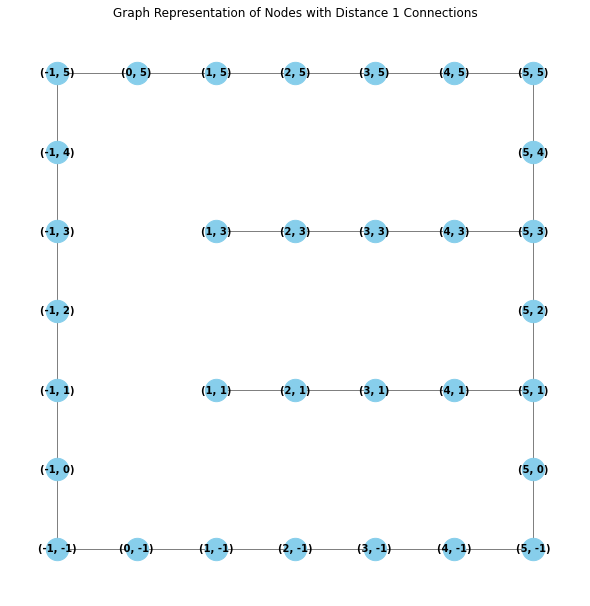

In [169]:
import matplotlib.pyplot as plt
perimeter_nodes = integer_perimeter_nodes([(0, 0), (1, 0), (0, 1), (2, 0), (3, 0), (4, 0), (0, 2), (1, 2), (0, 3), (2, 2), (3, 2), (4, 2), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)])

# Create a graph
G_test = nx.Graph()

# Iterate through the dictionary to add nodes and edges
for coord in perimeter_nodes:
    # Add the node
    G_test.add_node(coord)
    
    # Check neighbors and add edges
    neighbors = [
        (coord[0] + 1, coord[1]),  # Right
        (coord[0] - 1, coord[1]),  # Left
        (coord[0], coord[1] + 1),  # Up
        (coord[0], coord[1] - 1),  # Down
        
        #(coord[0] + 1, coord[1] +1),  # Right
        #(coord[0] - 1, coord[1] +1),  # Left
        #(coord[0] +1, coord[1] - 1),  # Up
        #(coord[0] - 1, coord[1] - 1),  # Down
    ]
    for neighbor in neighbors:
        if neighbor in perimeter_nodes:
                G_test.add_edge(coord, neighbor)

# Visualize or analyze the graph
print("Nodes:", G_test.nodes())
print("Edges:", G_test.edges())

print(len(list(nx.connected_components(G_test))))

# Plot the graph
plt.figure(figsize=(8, 8))
pos = {node: node for node in G_test.nodes()}  # Position nodes by their coordinate values
nx.draw(G_test, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Representation of Nodes with Distance 1 Connections")
plt.show()

In [166]:
import networkx as nx

# List of edges in the form (node1, node2, {})
from collections import defaultdict

def find_straight_lines(G):
    # Store nodes by their coordinates (x, y)
    nodes_by_x = defaultdict(set)
    nodes_by_y = defaultdict(set)

    # Populate the dictionaries
    for node in G.nodes:
        x, y = node  # Assuming nodes have 'coord' attribute with (x, y)
        nodes_by_x[x].add(y)
        nodes_by_y[y].add(x)
    
    horizontal_lines = 0
    vertical_lines = 0
    
    # Check horizontal lines
    for y in nodes_by_y:
        sorted_xs = sorted(nodes_by_y[y])
        # Look for consecutive x values with distance 1
        count = 1  # At least one node is a valid starting point
        for i in range(1, len(sorted_xs)):
            if sorted_xs[i] == sorted_xs[i-1] + 1:
                count += 1
            else:
                if count > 1:
                    horizontal_lines += 1
                count = 1  # Reset for the next sequence
        if count > 1:
            horizontal_lines += 1  # For the last sequence
    
    # Check vertical lines
    for x in nodes_by_x:
        sorted_ys = sorted(nodes_by_x[x])
        # Look for consecutive y values with distance 1
        count = 1  # At least one node is a valid starting point
        for i in range(1, len(sorted_ys)):
            if sorted_ys[i] == sorted_ys[i-1] + 1:
                count += 1
            else:
                if count > 1:
                    vertical_lines += 1
                count = 1  # Reset for the next sequence
        if count > 1:
            vertical_lines += 1  # For the last sequence
    
    return horizontal_lines + vertical_lines

# Extract continuous straight edges
#horizontal_groups, vertical_groups = find_straight_lines(G)
#print(horizontal_groups, vertical_groups)

# Display the result
#print("Horizontal continuous sections:")
#for group in horizontal_groups:
#    print(group)

#print("\nVertical continuous sections:")
#for group in vertical_groups:
#    print(group)

In [146]:
# Extract continuous straight edges
find_straight_lines(G)


12

In [159]:

def get_max_count(orig_nodes):
    # Initialize a graph
    G_per = nx.Graph()

    #orig_nodes = [(3, 2), (3, 3), (2, 1), (2, 2)]

    # Example perimeter_nodes (list of coordinates)
    perimeter_nodes = integer_perimeter_nodes(orig_nodes)

    # Initialize node addition counts
    for coord in perimeter_nodes:
        # Add the node if it doesn't exist and initialize the count to 0
        if not G_per.has_node(coord):
            G_per.add_node(coord, count=0)  # Add the node with an attribute 'count' set to 0
        # Increment the count each time the node is encountered
        #G.nodes[coord]['count'] += 1

        # Check neighbors and add edges
        neighbors = [
            (coord[0] + 1, coord[1]),  # Right
            (coord[0] - 1, coord[1]),  # Left
            (coord[0], coord[1] + 1),  # Up
            (coord[0], coord[1] - 1),  # Down
        ]

        for neighbor in neighbors:

            if neighbor in orig_nodes:
                G_per.nodes[coord]['count'] += 1
            if neighbor in perimeter_nodes:

                if not G_per.has_node(neighbor):
                    G_per.add_node(neighbor, count=0)  # Add neighbor if not already added
                  # Increment count for the neighbor
                G_per.add_edge(coord, neighbor)

    # Count connected components and find the highest count in each subcomponent
    connected_components = list(nx.connected_components(G_per))

    # Iterate over each connected component and find the highest node count
    max_counts_per_component = []
    for component in connected_components:
        # For each component, find the node with the highest count
        max_count = max(G_per.nodes[node]['count'] for node in component)
        #print(max_count)
        max_counts_per_component.append(max_count)

    # Print the highest count for each connected component
    print("Highest count per connected component:", max_counts_per_component)
    return sum(max_counts_per_component)

get_max_count([(3, 2), (3, 3), (2, 1), (2, 2)])

Highest count per connected component: [2]


2

In [167]:

def get_perimeter_graph(orig_nodes):
    perimeter_nodes = integer_perimeter_nodes(orig_nodes)

    # Create a graph
    G_per = nx.Graph()

    # Iterate through the dictionary to add nodes and edges
    for coord in perimeter_nodes:
        # Add the node
        G_per.add_node(coord)

        # Check neighbors and add edges
        neighbors = [
            (coord[0] + 1, coord[1]),  # Right
            (coord[0] - 1, coord[1]),  # Left
            (coord[0], coord[1] + 1),  # Up
            (coord[0], coord[1] - 1),  # Down

            #(coord[0] + 1, coord[1] +1),  # Right
            #(coord[0] - 1, coord[1] +1),  # Left
            #(coord[0] +1, coord[1] - 1),  # Up
            #(coord[0] - 1, coord[1] - 1),  # Down
        ]
        for neighbor in neighbors:
            if neighbor in perimeter_nodes:
                    G_per.add_edge(coord, neighbor)
    return G_per

    # Visualize or analyze the graph
    #print("Nodes:", G.nodes())
    #print("Edges:", G.edges())

    #print(len(list(nx.connected_components(G))))

In [168]:
ans = 0
# Find connected components
components = list(nx.connected_components(G))

# Iterate over the components
#for i, component in enumerate(components, start=1):
#    print(f"Component {i}: {component}")

# Optional: Create subgraphs for each component
subgraphs = [G.subgraph(component) for component in components]
for i, subgraph in enumerate(subgraphs, start=1):
    print(f"Subgraph {i} nodes: {list(subgraph.nodes())}")
    print(list(subgraph.nodes()), find_straight_lines(get_perimeter_graph(subgraph)))
    ans += len(list(subgraph.nodes())) * find_straight_lines(get_perimeter_graph(subgraph))
ans

Subgraph 1 nodes: [(0, 0), (1, 0), (0, 1), (2, 0), (3, 0), (4, 0), (0, 2), (1, 2), (0, 3), (2, 2), (3, 2), (4, 2), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
[(0, 0), (1, 0), (0, 1), (2, 0), (3, 0), (4, 0), (0, 2), (1, 2), (0, 3), (2, 2), (3, 2), (4, 2), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)] 6
Subgraph 2 nodes: [(3, 1), (1, 1), (4, 1), (2, 1)]
[(3, 1), (1, 1), (4, 1), (2, 1)] 4
Subgraph 3 nodes: [(2, 3), (3, 3), (1, 3), (4, 3)]
[(2, 3), (3, 3), (1, 3), (4, 3)] 4


134

In [ ]:
#736291 too low

Nodes: [((3, -1), {'count': 1}), ((4, -1), {'count': 1}), ((2, -1), {'count': 1}), ((3, 1), {'count': 2}), ((4, 1), {'count': 2}), ((3, 2), {'count': 2}), ((5, -1), {'count': 1}), ((6, -1), {'count': 0}), ((4, 6), {'count': 1}), ((5, 6), {'count': 1}), ((3, 6), {'count': 1}), ((1, 6), {'count': 1}), ((2, 6), {'count': 1}), ((0, 6), {'count': 1}), ((1, 3), {'count': 2}), ((2, 3), {'count': 2}), ((1, 4), {'count': 2}), ((6, 2), {'count': 1}), ((6, 3), {'count': 1}), ((6, 1), {'count': 1}), ((-1, -1), {'count': 0}), ((0, -1), {'count': 1}), ((-1, 0), {'count': 1}), ((-1, 4), {'count': 1}), ((-1, 5), {'count': 1}), ((-1, 3), {'count': 1}), ((6, 5), {'count': 1}), ((6, 6), {'count': 0}), ((6, 4), {'count': 1}), ((-1, 1), {'count': 1}), ((-1, 2), {'count': 1}), ((4, 2), {'count': 2}), ((1, -1), {'count': 1}), ((2, 4), {'count': 2}), ((6, 0), {'count': 1}), ((-1, 6), {'count': 0})]
Edges: [((3, -1), (4, -1), {}), ((3, -1), (2, -1), {}), ((4, -1), (5, -1), {}), ((2, -1), (1, -1), {}), ((3, 1),

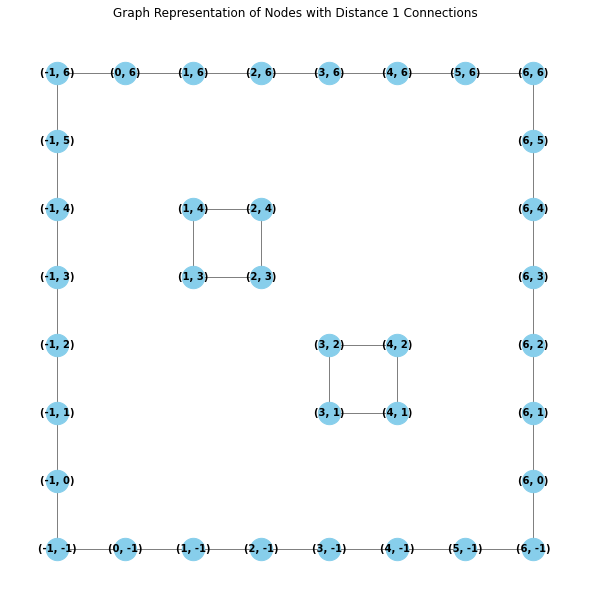

In [136]:
import networkx as nx

# Initialize a graph
G = nx.Graph()

orig_nodes = [(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (3, 0), (2, 1), (4, 0), (5, 0), (5, 1), (0, 2), (1, 2), (2, 2), (5, 2), (0, 3), (5, 3), (0, 4), (3, 3), (4, 3), (3, 4), (4, 4), (5, 4), (0, 5), (3, 5), (4, 5), (5, 5), (1, 5), (2, 5)]

# Example perimeter_nodes (list of coordinates)
perimeter_nodes = integer_perimeter_nodes(orig_nodes)

# Initialize node addition counts
for coord in perimeter_nodes:
    # Add the node if it doesn't exist and initialize the count to 0
    if not G.has_node(coord):
        G.add_node(coord, count=0)  # Add the node with an attribute 'count' set to 0
    # Increment the count each time the node is encountered
    #G.nodes[coord]['count'] += 1

    # Check neighbors and add edges
    neighbors = [
        (coord[0] + 1, coord[1]),  # Right
        (coord[0] - 1, coord[1]),  # Left
        (coord[0], coord[1] + 1),  # Up
        (coord[0], coord[1] - 1),  # Down
    ]
    
    for neighbor in neighbors:

        if neighbor in orig_nodes:
            G.nodes[coord]['count'] += 1
        if neighbor in perimeter_nodes:
            
            if not G.has_node(neighbor):
                G.add_node(neighbor, count=0)  # Add neighbor if not already added
              # Increment count for the neighbor
            G.add_edge(coord, neighbor)

# Visualize or analyze the graph
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

# Count connected components
print("Number of connected components:", len(list(nx.connected_components(G))))

# Plot the graph
plt.figure(figsize=(8, 8))
pos = {node: node for node in G.nodes()}  # Position nodes by their coordinate values
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Representation of Nodes with Distance 1 Connections")
plt.show()

In [108]:
from shapely.geometry import Polygon

# Example points (these should be in the form of a list of tuples)
points = [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)]

# Create a Polygon
polygon = Polygon(points)

# Get exterior edges (the boundary of the shape)
exterior_edges = list(polygon.exterior.coords)

# Count the number of exterior edges
num_exterior_edges = len(exterior_edges) - 1  # minus 1 because the last point connects to the first one

print(f"Number of exterior edges: {num_exterior_edges}")

# Interior edges would be trickier to calculate, but you can access them using interior property
interior_edges = polygon.interiors  # This is a list of holes, if any
print(f"Number of interior edges: {len(interior_edges)}")

Number of exterior edges: 9
Number of interior edges: 0


In [116]:
# Initialize direction
prev_direction = None
direction_changes = 0

# Iterate through the points
for i in range(1, len(exterior_edges)):
    x1, y1 = exterior_edges[i - 1]
    x2, y2 = exterior_edges[i]
    
    if x1 != x2 and y1 != y2:  # Skip points that aren't straight (diagonal or non-connected points)
        continue
    print(x1,x2)
    # Determine the direction (horizontal or vertical)
    if x1 == x2:
        current_direction = 'vertical'
    else:
        current_direction = 'horizontal'
    print(current_direction)
    
    # Check if the direction changes
    if prev_direction and prev_direction != current_direction:
        direction_changes += 1
    
    # Update the previous direction
    prev_direction = current_direction

# Output the result
print(f"Number of direction changes: {direction_changes}")

0.0 1.0
horizontal
1.0 2.0
horizontal
0.0 1.0
horizontal
1.0 2.0
horizontal
0.0 1.0
horizontal
1.0 2.0
horizontal
Number of direction changes: 0


In [118]:
# Function to count straight sections
def count_straight_sections(points):
    if not points:
        return 0

    # Initialize the section count
    straight_sections = 1  # Start with the first section
    prev_direction = None  # To track the previous direction

    # Traverse through the points
    for i in range(1, len(points)):
        x1, y1 = points[i - 1]
        x2, y2 = points[i]

        if x1 == x2 and y1 == y2:
            continue  # Skip duplicate points (optional, if you want to handle them)

        # Determine if this is a horizontal or vertical line
        if x1 == x2:
            current_direction = 'vertical'
        elif y1 == y2:
            current_direction = 'horizontal'
        else:
            continue  # This is a diagonal or non-straight line, so we skip it

        # If the direction changes, increase the straight section count
        if prev_direction and prev_direction != current_direction:
            straight_sections += 1

        # Update the previous direction
        prev_direction = current_direction

    return straight_sections

count_straight_sections(sorted(exterior_edges))

1

In [121]:
def count_straight_edges(points):
    # Convert the list of points to a set for fast lookups
    points_set = set(tuple(point) for point in points)
    
    horizontal_edges = 0
    vertical_edges = 0
    
    # Check horizontal edges (rows)
    # We loop over unique y-values and check consecutive x-values for each y
    visited_rows = set()
    for (x, y) in points:
        if y not in visited_rows:
            # Get all x-coordinates for the current row (y-coordinate)
            row_blocks = sorted([x for (x_check, y_check) in points if y_check == y])
            horizontal_edges += count_consecutive_edges(row_blocks)
            visited_rows.add(y)
    
    # Check vertical edges (columns)
    # We loop over unique x-values and check consecutive y-values for each x
    visited_columns = set()
    for (x, y) in points:
        if x not in visited_columns:
            # Get all y-coordinates for the current column (x-coordinate)
            column_blocks = sorted([y for (x_check, y_check) in points if x_check == x])
            vertical_edges += count_consecutive_edges(column_blocks)
            visited_columns.add(x)
    
    # Total edges is the sum of horizontal and vertical edges
    total_edges = horizontal_edges + vertical_edges
    return total_edges

def count_consecutive_edges(blocks):
    """Helper function to count consecutive edges in a sorted list of blocks."""
    if not blocks:
        return 0
    edges = 0
    for i in range(1, len(blocks)):
        # If consecutive blocks are found, it means we are continuing the same edge
        if blocks[i] != blocks[i - 1] + 1:
            edges += 1
    edges += 1  # Count the first segment
    return edges

count_straight_edges([(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (2, 2)])

18